# Pertemuan 4
- Image Blending
- Image Bitwise Operation
- Range Thresholding
- Canny Edge Detection

___

### Maximizing Jetson Nano Perfomance
```
sudo nvpmodel -m 0
sudo jetson_clocks
```

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


___
# 1. Image Blending
Image blending formula, <br>
$g(x)=(1−α)f0(x)+αf1(x)$ <br><br>
$f0$ is the first image, $f1$ is the second image, <br>
and $α$ is *temporal cross-dissolve* parameter between the two image, where α  value between 0→1. <br><br>
- function `cv2.addWeighted(src1, alpha, src2, beta, gamma, dst)`
- where : 
    - `src1` : First source array.
    - `alpha` : Weight for the first array elements.
    - `src2` : Second source array of the same size and channel number as src1 .
    - `beta` : Weight for the second array elements.
    - `gamma` : Scalar added to each sum.
    - `dst` : Destination array that has the same size and number of channels as the input arrays.

In [ ]:
alpha = 0.2

img1 = cv2.imread('lena.jpg')
img2 = cv2.imread('apple.jpg')
    
beta = (1.0 - alpha)
blending_img = cv2.addWeighted(img1, alpha, img2, beta, 0.0)

cv2.imshow('Blending Result', blending_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

- Overlay Transparent Shape 

In [ ]:
# Example Overlay Transparent Shape

alpha = 0.5

img = cv2.imread('lena.jpg')

overlay = np.zeros_like(img)
cv2.rectangle(overlay, (80,50), (300,320), (255, 0, 0), -1) # add blue overlay

img_blend = cv2.addWeighted(img, 1, overlay, alpha, 0.0)

cv2.imshow("Overlay Image", img_blend)
cv2.waitKey(0)
cv2.destroyAllWindows()

- Bounding Box Detection Transparent

In [ ]:
# Example Bounding Box Detection Transparent

alpha = 0.5

img = cv2.imread('lena.jpg')

pts = np.array([[80,30], [200, 30], [210,50], [80,50]])
overlay = np.zeros_like(img)
cv2.rectangle(overlay, (80,50), (300,320), (255, 0, 0), -1) # add blue overlay
cv2.fillPoly(overlay, [pts], (255, 255, 255)) # add label blue overlay
cv2.rectangle(overlay, (80,50), (300,320), (255, 255, 255), 2) # add white border
cv2.polylines(overlay, [pts], True, (255, 255, 255), 2) # add label white border
cv2.putText(overlay,  "lena (98%)", (85, 45), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1)

img_blend = cv2.addWeighted(img, 1, overlay, alpha, 0.0)

cv2.imshow("Overlay Image", img_blend)
cv2.waitKey(0)
cv2.destroyAllWindows()

- Bounding Box Detection Half Transparent

In [ ]:
# Example Bounding Box Detection Half Transparent

alpha = 0.5

img = cv2.imread('lena.jpg')

pts = np.array([[80,30], [200, 30], [210,50], [80,50]])
overlay = np.zeros_like(img)
cv2.rectangle(overlay, (80,50), (300,320), (255, 0, 0), -1) # add blue overlay
cv2.fillPoly(img, [pts], (255, 255, 255)) # add label blue overlay
cv2.rectangle(overlay, (80,50), (300,320), (255, 255, 255), 2) # add white border
cv2.polylines(img, [pts], True, (255, 255, 255), 2) # add label white border
cv2.putText(img,  "lena (98%)", (85, 45), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1)

img_blend = cv2.addWeighted(img, 1, overlay, alpha, 0.0)

cv2.imshow("Overlay Image", img_blend)
cv2.waitKey(0)
cv2.destroyAllWindows()

- Modifying draw_ped() 

In [ ]:
# previous draw_ped() implementation in Training Jetson Nano Object Detection

def draw_ped(img, label, x0, y0, xt, yt, font_size=0.4, color=(255,127,0), text_color=(255,255,255)):

    y0, yt = max(y0 - 15, 0) , min(yt + 15, img.shape[0])
    x0, xt = max(x0 - 15, 0) , min(xt + 15, img.shape[1])

    (w, h), baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, font_size, 1)
    cv2.rectangle(img,
                    (x0, y0 + baseline),  
                    (max(xt, x0 + w), yt), 
                    color, 
                    2)
    cv2.rectangle(img,
                    (x0, y0 - h - baseline),  
                    (x0 + w, y0 + baseline), 
                    color, 
                    -1)
    cv2.rectangle(img,
                    (x0, y0 - h - baseline),  
                    (x0 + w, y0 + baseline), 
                    color, 
                    2)  
    cv2.putText(img, 
                label, 
                (x0, y0),                   
                cv2.FONT_HERSHEY_SIMPLEX,     
                font_size,                          
                text_color,                
                1,
                cv2.LINE_AA) 
    return img

In [ ]:
img = cv2.imread("lena.jpg")

# draw_ped(img, label, x0, y0, xt, yt, ....)
img = draw_ped(img, "lena (98%)", 80, 50, 300, 320)

cv2.imshow("Draw Ped Original", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# Modified draw_ped() implementation using image blending

def draw_ped(img, label, x0, y0, xt, yt, font_size=0.4, alpha=0.5, bg_color=(255,0,0), ouline_color=(255,255,255), text_color=(0,0,0)):
    overlay = np.zeros_like(img)

    y0, yt = max(y0 - 15, 0) , min(yt + 15, img.shape[0])
    x0, xt = max(x0 - 15, 0) , min(xt + 15, img.shape[1])

    (w, h), baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, font_size, 1)
    cv2.rectangle(overlay,
                    (x0, y0 + baseline),  
                    (max(xt, x0 + w), yt), 
                    bg_color, 
                    -1)
    cv2.rectangle(overlay,
                    (x0, y0 + baseline),  
                    (max(xt, x0 + w), yt), 
                    ouline_color, 
                    2)
    pts = np.array([[x0, y0 - h - baseline], # top left
                    [x0 + w, y0 - h - baseline], # top right
                    [x0 + w + 10, y0 + baseline], # bolom right
                    [x0,y0 + baseline]]) # bottom left
    cv2.fillPoly(img, [pts], ouline_color) # add label white fill
    cv2.polylines(img, [pts], True, ouline_color, 2) # add label white border 
    cv2.putText(img, 
                label, 
                (x0, y0),                   
                cv2.FONT_HERSHEY_SIMPLEX,     
                font_size,                          
                text_color,                
                1,
                cv2.LINE_AA) 

    img_blend = cv2.addWeighted(img, 1, overlay, alpha, 0.0)

    return img_blend

In [ ]:
img = cv2.imread("lena.jpg")

# draw_ped(img, label, x0, y0, xt, yt, ....)
img = draw_ped(img, "lena (98%)", 80, 50, 300, 320)

cv2.imshow("Draw Ped Original", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 1.2 CUDA Implementation Image Blending
- function `cv2.cuda.addWeighted(src1, alpha, src2, beta, gamma, dst)`
- where : 
    - `src1` : First source array / GPU Mat.
    - `alpha` : Weight for the first array elements.
    - `src2` : Second source array of the same size and channel number as src1 / GPU Mat.
    - `beta` : Weight for the second array elements.
    - `gamma` : Scalar added to each sum.
    - `dst` : Destination array that has the same size and number of channels as the input arrays / GPU Mat.

In [ ]:
alpha = 0.5

img1 = cv2.imread('lena.jpg')
img2 = cv2.imread('apple.jpg')
    
img1_GpuMat = cv2.cuda_GpuMat() # Create GpuMat object 
img1_GpuMat.create((w, h), cv2.CV_8UC3) # cv2.CV_8UC3 -> 8bit image 3 channel
img2_GpuMat = cv2.cuda_GpuMat() # Create GpuMat object 
img2_GpuMat.create((w, h), cv2.CV_8UC3) # cv2.CV_8UC3 -> 8bit image 3 channel
blending_img_GpuMat = cv2.cuda_GpuMat() # Create GpuMat object 
blending_img_GpuMat.create((w, h), cv2.CV_8UC3) # cv2.CV_8UC3 -> 8bit image 3 channel

# Upload to GPU memory
img1_GpuMat.upload(img1)
img2_GpuMat.upload(img2)

beta = (1.0 - alpha)
cv2.cuda.addWeighted(img1_GpuMat, alpha, img2_GpuMat, beta, 0.0, blending_img_GpuMat)

# Download to Host memory
blending_img = blending_img_GpuMat.download()


cv2.imshow('Blending Result', blending_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

___
# 2. Image Bitwise Operation

- Highly useful while extracting any part of the image, defining and working with **non-rectangular ROI** (region of interest). <br>
<img src="res/sssample_mask.png" style="width:500px; margin-top:10px"></img><br>
- Review **Bitwise Operation** (AND, OR, NOT, and XOR operation).<br>
<img src="res/bitwise_operator.jpg" style="width:500px; margin-top:10px"></img><br>
- Method :
    - Bitwise AND : `cv2.bitwise_and(img1, img2, mask)`
    - Bitwise OR : `cv2.bitwise_or(img1, img2, mask)`
    - Bitwise NOT : `cv2.bitwise_not(img1, mask)` , only one image required.
    - Bitwise XOR : `cv2.bitwise_not(img1, img2, mask)`
- with parameter :
    - `img1` : input image 1
    - `img2` : input image 2
    - `mask` : optional operation mask, **8-bit single channel** array, that specifies **elements of the output array to be changed**. <br>
    <img src="res/mask_hand.png" style="width:200px; margin-top:10px"></img>
    


- Create Masking Circle

In [ ]:
mask = np.zeros((300,300), np.uint8) # create black image using numpy
cv2.circle(mask, (150, 150), 80, (255, 255,  255), -1) # draw circle in mask

# show 
cv2.imshow('Circle Mask', mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

- Apply masking to image using bitwise and

In [ ]:
# Crop Lena face in Circle ROI

img = cv2.imread("lena.jpg")
h, w, c = img.shape

mask = np.zeros((h,w), np.uint8) # create black image using numpy
cv2.circle(mask, (w//2, h//2), 150, (255, 255,  255), -1) # draw circle in mask

res = cv2.bitwise_and(img, img, mask=mask)

# show 
cv2.imshow('Circle Mask', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

- what happend if we use different image on `cv2.bitwise_and` ?

In [ ]:
img1 = cv2.imread("lena.jpg")
img2 = cv2.imread("apple.jpg")
h, w, c = img1.shape

mask = np.zeros((h,w), np.uint8) # create black image using numpy
cv2.circle(mask, (w//2, h//2), 150, (255, 255,  255), -1) # draw circle in mask

res = cv2.bitwise_and(img1, img2, mask=mask)

# show 
plt.figure(figsize=(20,7))
plt.subplot(1, 4, 1)
plt.title("Original Image 1")
plt.imshow(img1[:,:,::-1])

plt.subplot(1, 4, 2)
plt.title("Original Image 2")
plt.imshow(img2[:,:,::-1])

plt.subplot(1, 4, 3)
plt.title("Masking Image")
plt.imshow(mask, cmap="gray")

plt.subplot(1, 4, 4)
plt.title("Bitwise Result")
plt.imshow(res[:,:,::-1])

- Create Masking Polyfill

In [ ]:
mask = np.ones((720, 960), np.uint8) # create black image using numpy
pts= np.array([[290,460],
                [530, 460],
                [900, 690],
                [60, 690]])
cv2.fillPoly(mask, [pts], (255, 255,  255)) # draw polyfill in mask

# show 
cv2.imshow('Polyfill Mask', mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

- Apply masking to image using bitwise and

In [ ]:
# Crop Highway roadline in polygon shape

img = cv2.imread("highway.png")
h, w, c = img.shape

mask = np.zeros((h, w), np.uint8) # create black image using numpy
pts= np.array([[290,460],
                [530, 460],
                [900, 690],
                [60, 690]])
cv2.fillPoly(mask, [pts], (255, 255,  255)) # draw polyfill in mask

res = cv2.bitwise_and(img, img, mask=mask)

# show 
plt.figure(figsize=(20,7))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img[:,:,::-1])

plt.subplot(1, 3, 2)
plt.title("Masking Image")
plt.imshow(mask, cmap="gray")

plt.subplot(1, 3, 3)
plt.title("Bitwise Result")
plt.imshow(res[:,:,::-1])

## 2.2 CUDA Implementation Image Bitwise Operation

- Method :
    - Bitwise AND : `cv2.cuda.bitwise_and(img1, img2, dst, mask)`
    - Bitwise OR : `cv2.cuda.bitwise_or(img1, img2, dst, mask)`
    - Bitwise NOT : `cv2.cuda.bitwise_not(img1, dst, mask)` , only one image required.
    - Bitwise XOR : `cv2.cuda.bitwise_not(img1, img2, dst, mask)`
- with parameter :
    - `img1` : input image 1 (GPU Mat)
    - `img2` : input image 2 (GPU Mat)
    - `dst` : output image (GPU Mat)
    - `mask` : optional operation mask, **8-bit single channel** array, that specifies **elements of the output array to be changed** (GPU Mat). 

In [ ]:
alpha = 0.5

img = cv2.imread('highway.png')
h, w, c = img.shape

# create mask
mask = np.zeros((h, w), np.uint8) # create black image using numpy
pts= np.array([[290,460],
                [530, 460],
                [900, 690],
                [60, 690]])
cv2.fillPoly(mask, [pts], (255, 255,  255)) # draw polyfill in mask

# GPU memory initialization
img_GpuMat = cv2.cuda_GpuMat() # Create GpuMat object 
img_GpuMat.create((w, h), cv2.CV_8UC3) # cv2.CV_8UC3 -> 8bit image 3 channel
mask_GpuMat = cv2.cuda_GpuMat() # Create GpuMat object 
mask_GpuMat.create((w, h), cv2.CV_8UC1) # cv2.CV_8UC1 -> 8bit image 1 channel
res_GpuMat = cv2.cuda_GpuMat() # Create GpuMat object 
res_GpuMat.create((w, h), cv2.CV_8UC3) # cv2.CV_8UC3 -> 8bit image 3 channel

# Upload to GPU memory
img_GpuMat.upload(img)
mask_GpuMat.upload(mask)

# apply CUDA bitwise operation 
# bitwise AND, OR & XOR ERROR - OpenCV 4.4.0
cv2.cuda.bitwise_not(img_GpuMat, res_GpuMat, mask=mask_GpuMat) # apply bitwise NOT to original image -> result image
cv2.cuda.bitwise_not(res_GpuMat, res_GpuMat, mask=mask_GpuMat) # apply bitwise NOT to result image 
                                                               # (now, color is the same as original)

# Download to Host memory
res = res_GpuMat.download()


plt.figure(figsize=(20,7))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img[:,:,::-1])

plt.subplot(1, 3, 2)
plt.title("Masking Image")
plt.imshow(mask, cmap="gray")

plt.subplot(1, 3, 3)
plt.title("CUDA Bitwise Result")
plt.imshow(res[:,:,::-1])

## 2.3 Use Simple Thresholding to create Mask

In [ ]:
img = cv2.imread("Tomat.jpg")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 230, 255, cv2.THRESH_BINARY_INV)

res = cv2.bitwise_and(img, img, mask=thresh)

plt.figure(figsize=(20,7))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img[:,:,::-1])

plt.subplot(1, 3, 2)
plt.title("Masking Image")
plt.imshow(thresh, cmap="gray")

plt.subplot(1, 3, 3)
plt.title("Bitwise And Result")
plt.imshow(res[:,:,::-1])

___
# 3. Range Thresholding
- Image thresholding using `cv2.threshold()` function. <br>
<img src="res/Binary_Thresh.png" style="width: 500px; margin-top:10px;" > </img>
- Now we will learn how to do **range based thresholding** using  `cv2.inRange()` function. <br>
<img src="res/Range_Thresh_.png" style="width: 500px; margin-top:10px;" > </img>
- The concept remains the same, but now we add a range of pixel values we need.
- Method `cv2.inRange(img, lower_color, upper_color)`
- where theparameter :
    - `img` : input image (HSV color space)
    - `lower_color` : tuple (H, S, V) of lower color 
    - `upper_color` : tuple (H, S, V) of upper color 
- `H, S, V` value range in OpenCV:
    - `H` (0 - 180)
    - `S` (0 - 255)
    - `V` (0 - 255)
- `cv2.inRange()` using **HSV colorspace**, since the **hue channel** models the **color type**, it is very useful in image processing tasks that need to **segment objects based on its color**.<br>
<img src="res/Threshold_inRange_HSV_colorspace.jpg" style="width: 300px; margin-top:10px;" > </img>
- Since colors in the **RGB colorspace** are coded using the **three channels**, it is **more difficult** to segment an object in the image based on its color.<br>
<img src="res/Threshold_inRange_RGB_colorspace.jpg" style="width: 300px; margin-top:10px;" > </img>
- **HSV colorspace** model : <br>
<img src="res/HSV_hue_model.png" style="width: 300px; margin-top:10px;" > </img>

## 3.1 Convert to HSV Color space
- Conver RGB value to HSV (`cv2.cvtColor()`)

In [ ]:
blue = np.uint8([[[0,255,0 ]]]) # single pixel green color RGB

hsv_blue = cv2.cvtColor(blue, cv2.COLOR_BGR2HSV)

print( hsv_blue )

- HSV Color Range for Range Thresholding 

In [ ]:
# define range of blue color in HSV
lower_blue = np.array([110, 50, 50])
upper_blue = np.array([130, 255, 255])

# define range of red color in HSV
lower_red = np.array([-10, 50, 50])
upper_red = np.array([10, 255, 255])

# define range of green color in HSV
lower_green = np.array([35, 50, 50])
upper_green = np.array([70, 255, 255])

In [ ]:
img = cv2.imread('blocks.jpg')

#convert to hsv
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Threshold the HSV image to get only green colors
mask = cv2.inRange(hsv.copy(), lower_green, upper_green)

# apply thresholding result to bitwise and as mask
res = cv2.bitwise_and(img, img, mask= mask)

# show result
plt.figure(figsize=(20,7))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img[:,:,::-1])

plt.subplot(1, 3, 2)
plt.title("Masking Image")
plt.imshow(mask, cmap="gray")

plt.subplot(1, 3, 3)
plt.title("Segmented Image")
plt.imshow(res[:,:,::-1])

- Combine multiple color range in one detection

In [ ]:
img = cv2.imread('blocks.jpg')

#convert to hsv
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Threshold the HSV image to get only red, green & blue colors
mask_blue = cv2.inRange(hsv.copy(), lower_blue, upper_blue)
mask_green = cv2.inRange(hsv.copy(), lower_green, upper_green)
mask_red = cv2.inRange(hsv.copy(), lower_red, upper_red)

# combine all mask
mask = mask_blue + mask_green + mask_red

# apply thresholding result to bitwise and as mask
res = cv2.bitwise_and(img, img, mask= mask)

# show result
plt.figure(figsize=(20,7))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img[:,:,::-1])

plt.subplot(1, 3, 2)
plt.title("Masking Image")
plt.imshow(mask, cmap="gray")

plt.subplot(1, 3, 3)
plt.title("Segmented Image")
plt.imshow(res[:,:,::-1])

## 3.2 CUDA Implementation Range Thresholding 
## !!! cv2.cuda.inRange only implemented on OpenCV 4.5.2 or above !!!
- Method `cv2.cuda.inRange(img, lower_color, upper_color, dst)`
- where theparameter :
    - `img` : input image (HSV color space) in GPU Mat
    - `lower_color` : tuple (H, S, V) of lower color 
    - `upper_color` : tuple (H, S, V) of upper color 
    - `dst` : output image (HSV Color Space) in GPU Mat


In [ ]:
img = cv2.imread('blocks.jpg')
h, w, c = img.shape

# GPU memory initialization
img_GpuMat = cv2.cuda_GpuMat() # Create GpuMat object 
img_GpuMat.create((w, h), cv2.CV_8UC3) # cv2.CV_8UC3 -> 8bit image 3 channel
hsv_GpuMat = cv2.cuda_GpuMat() # Create GpuMat object 
hsv_GpuMat.create((w, h), cv2.CV_8UC3) # cv2.CV_8UC3 -> 8bit image 3 channel
mask_GpuMat = cv2.cuda_GpuMat() # Create GpuMat object 
mask_GpuMat.create((w, h), cv2.CV_8UC1) # cv2.CV_8UC1 -> 8bit image 1 channel
res_GpuMat = cv2.cuda_GpuMat() # Create GpuMat object 
res_GpuMat.create((w, h), cv2.CV_8UC3) # cv2.CV_8UC3 -> 8bit image 3 channel

# upload to GPU memory
img_GpuMat.uload(img)

#convert to hsv
cv2.cuda.cvtColor(img_GpuMat, cv2.COLOR_BGR2HSV, hsv_GpuMat)

# Threshold the HSV image to get only colors
cv2.inRange(hsv_GpuMat, lower_blue, upper_blue, mask_GpuMat)

# apply thresholding result to bitwise and as mask
cv2.bitwise_and(img_GpuMat, img_GpuMat, res_GpuMat, mask= mask_GpuMat)

# Download to Host Memory
mask = mask_GpuMat.download()
res = res_GpuMat.download()

# show result
plt.figure(figsize=(20,7))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img[:,:,::-1])

plt.subplot(1, 3, 2)
plt.title("Masking Image")
plt.imshow(mask, cmap="gray")

plt.subplot(1, 3, 3)
plt.title("Segmented Image")
plt.imshow(res[:,:,::-1])

___
# 4. Canny Edge Detection

- Canny Edge detection is most popular edge detection algorithm. 
- Can be used to find the edges of objects in the image.
- Canny Edge detection is illustrated as follows,<br>
![](res/canny.png)<br><br>
- method `cv2.Canny(img, threshMin, threshMax)`
- where : 
    - `img` : input image
    - `threshMin` : minimum threshold for the hysteresis procedure.
    - `threshMax` : maximum threshold for the hysteresis procedure.

In [ ]:
# EXAMPLE 1 : Find Edge image from Grayscale image

img = cv2.imread('blocks.jpg')

# convert to Gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Apply canny edge detection from grayscale image
edged = cv2.Canny(gray, 100, 250)

#show image 
# show result
plt.figure(figsize=(20,7))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img[:,:,::-1])

plt.subplot(1, 2, 2)
plt.title("Edged Image")
plt.imshow(edged, cmap="gray")

In [ ]:
# EXAMPLE 2 : Find Edge image from Binary Image

img = cv2.imread('Tomat.jpg')

# convert to Gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply simple binary thresholding
_, thresh = cv2.threshold(gray, 230, 255, cv2.THRESH_BINARY)

#Apply canny edge detection from grayscale image
edged = cv2.Canny(thresh, 100, 250)

#show image 
# show result
plt.figure(figsize=(20,20))
plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(img[:,:,::-1])

plt.subplot(2, 2, 2)
plt.title("Gray Image")
plt.imshow(gray, cmap="gray")

plt.subplot(2, 2, 3)
plt.title("Binary Image")
plt.imshow(thresh, cmap="gray")

plt.subplot(2, 2, 4)
plt.title("Edged Image")
plt.imshow(edged, cmap="gray")

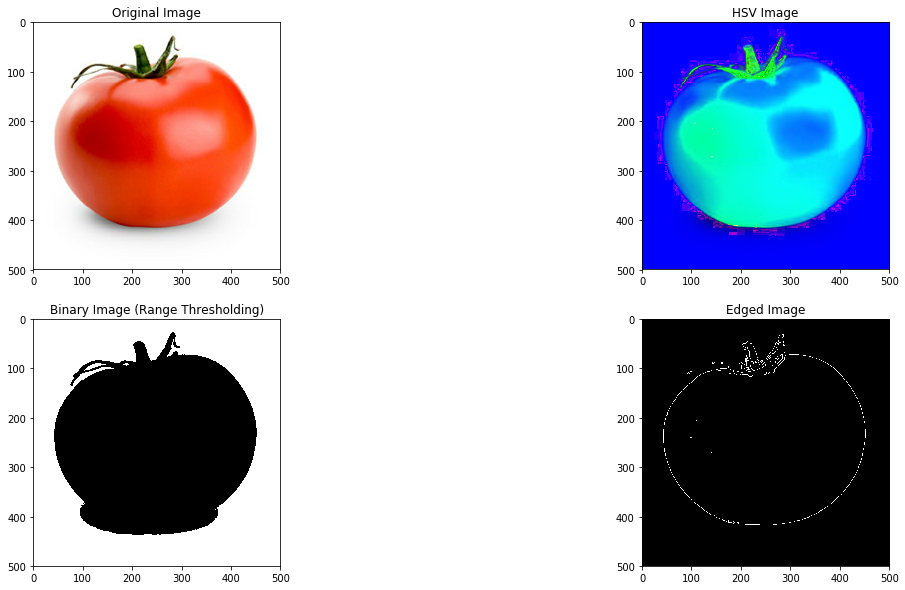

In [207]:
# EXAMPLE 3 : Find Edge image from Range Thresholding

img = cv2.imread('Tomat.jpg')

#convert to hsv
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Threshold the HSV image to get only red, green & blue colors
mask_blue = cv2.inRange(hsv.copy(), lower_blue, upper_blue)
mask_green = cv2.inRange(hsv.copy(), lower_green, upper_green)
mask_red = cv2.inRange(hsv.copy(), lower_red, upper_red)

# combine all mask
mask = mask_blue + mask_green + mask_red

#Apply canny edge detection from grayscale image
edged = cv2.Canny(mask, 100, 250)

#show image 
# show result
plt.figure(figsize=(20,20))
plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(img[:,:,::-1])

plt.subplot(2, 2, 2)
plt.title("Binary Image (Range Thresholding)")
plt.imshow(mask, cmap="gray")

plt.subplot(2, 2, 3)
plt.title("Edged Image")
plt.imshow(edged, cmap="gray")